<a href="https://colab.research.google.com/github/Gm-shuvo/AI_Lab/blob/main/digitHandWithAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[:5], y_train[:5]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
y_train_encode = to_categorical(y_train, 10)
y_test_encode = to_categorical(y_test, 10)
y_train_encode[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#plotion without augmentation

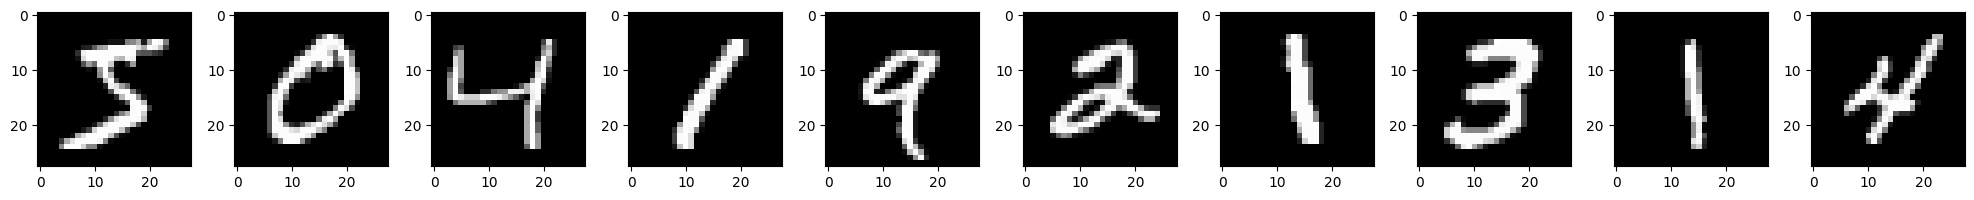

In [ ]:

plt.figure(figsize=(25, 2))
for i, image in enumerate(x_train[:10]):
  plt.subplot(1, 10, i+1)
  plt.imshow(image, cmap= 'gray')
plt.show()

Model Building

In [ ]:
model = keras.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, 'relu'),
    Dense(64, 'relu'),
    Dense(32, 'relu'),
    Dense(16, 'relu'),
    Dense(8, 'relu'),
    Dense(10, 'softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 10)                9

Fitting model


In [ ]:
history = model.fit(x_train, y_train_encode, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4518 - accuracy: 0.8575
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1481 - accuracy: 0.9587
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1012 - accuracy: 0.9717
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9779
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0583 - accuracy: 0.9826
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0480 - accuracy: 0.9854
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0348 - accuracy: 0.9887
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0314 - accuracy: 0.9900
Epoch 10/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.

In [ ]:
model.evaluate(x_test, y_test_encode, verbose= 0)

[0.1284516304731369, 0.9764000177383423]

In [ ]:
y_pred = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


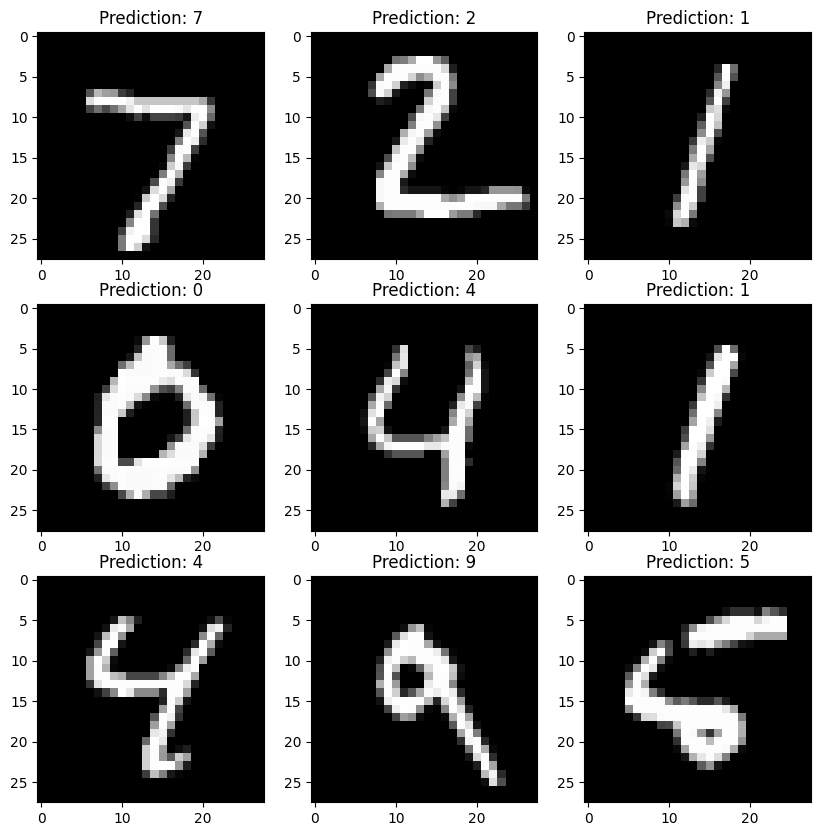

In [ ]:

plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i], cmap= 'gray')
  plt.title("Prediction: "+str(np.argmax(y_pred[i])))
plt.show()

#Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images by up to 10 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by up to 10% of the image width
    height_shift_range=0.1,  # randomly shift images vertically by up to 10% of the image height
    shear_range=0.1,  # randomly apply shearing transformations
    zoom_range=0.1  # randomly zoom in or out on images
)

# Fit the ImageDataGenerator on the training data
datagen.fit(x_train.reshape(-1, 28, 28, 1))

In [ ]:
#Building a Model
model1 = keras.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, 'relu'),
    Dense(64, 'relu'),
    Dense(32, 'relu'),
    Dense(16, 'relu'),
    Dense(8, 'relu'),
    Dense(10, 'softmax')
])

#Compilr Model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Model Summary
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
#Model Fit
model1.fit(datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train_encode, batch_size=32),epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 30s 15ms/step - loss: 0.6717 - accuracy: 0.7880
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2680 - accuracy: 0.9204
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2130 - accuracy: 0.9359
Epoch 4/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1811 - accuracy: 0.9459
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1655 - accuracy: 0.9496
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1537 - accuracy: 0.9533
Epoch 7/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1423 - accuracy: 0.9571
Epoch 8/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1329 - accuracy: 0.9592
Epoch 9/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1256 - accuracy: 0.9624
Epoch 10/20
1875/1875 [==============================] - 32s 17m

In [ ]:
#Evaluate Model
model1.evaluate(x_test, y_test_encode)

313/313 [==============================] - 1s 3ms/step - loss: 0.0589 - accuracy: 0.9825


[0.05890453979372978, 0.9825000166893005]

In [ ]:
#Predict Model
y_pred1 = model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


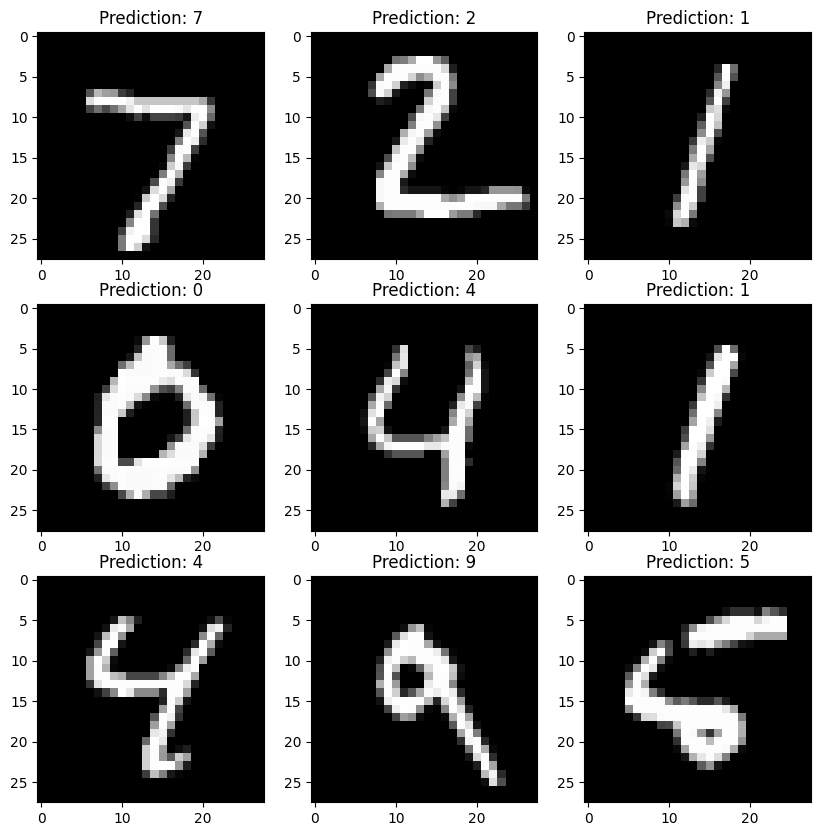

In [ ]:
#Ploting Model of Prediction
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i], cmap= 'gray')
  plt.title("Prediction: "+str(np.argmax(y_pred1[i])))
plt.show()